In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
new_dir_path = '/Users/okadamasayuki/修論実験/Character_onBlack'
try:
    os.makedirs(new_dir_path)
except FileExistsError:
    print('フォルダーが既に存在したためスルーしました')

In [32]:
# 画像に文字を重ねる
def put_char_onWhite(square, char, save_path):
    """
        char：重ねる文字
    """
    pix = [0, 0, 0, 255]   # ４つだとRGBA Aはアルファで透明度を意味する
    black_image_matrix = [ [ pix ] * square ] * square
    black_image_array = np.asarray(black_image_matrix)
    black_image_array = black_image_array.astype(np.uint8)
    black_image_pil = Image.fromarray(black_image_array)
#     plt.imshow(black_image_array)
#     plt.show()
    
    draw = ImageDraw.Draw(black_image_pil)  # ImageDrawオブジェクトを作成

    font = ImageFont.truetype("Arial", square)  # フォントを指定、64はサイズでピクセル単位
    size = font.getsize(char)

    draw.text((square/2 - size[0]/2, square/2 - size[1]/2 - square/10), char, font=font, fill='white')
    
    plt.imshow(black_image_pil)
    plt.show()
    black_image_pil.save(save_path+"/"+char+str(square)+"x"+str(square)+".png", 'PNG', quality=100, optimize=True)

In [ ]:
alp =["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q","R","S","T","U","V","W","X","Y","Z"]
square = 480
for i in range(len(alp)):
    put_char_onWhite(480, alp[i], new_dir_path)

In [63]:
# ここより上が、黒字に白のアルファベットを描いた元画像を作成しています。
# 画像のサイズは、square(pixel) x square(pixel)です。

In [34]:
# バタワースフィルタが入っているライブラリです。
import psychopy.filters

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [64]:
# フィルタを適用した画像を保存するフォルダーを、processingの実験プログラムのフィルダ内に作成してます。
Passed_save_path = '/Users/okadamasayuki/Desktop/experiment_which_alphabet_use/'+str(square)+"x"+str(square)
try:
    os.makedirs(Passed_save_path)
except FileExistsError:
    print('フォルダーが既に存在したためスルーしました')

フォルダーが既に存在したためスルーしました


In [73]:
min_cycle = 4
max_cycle = 5

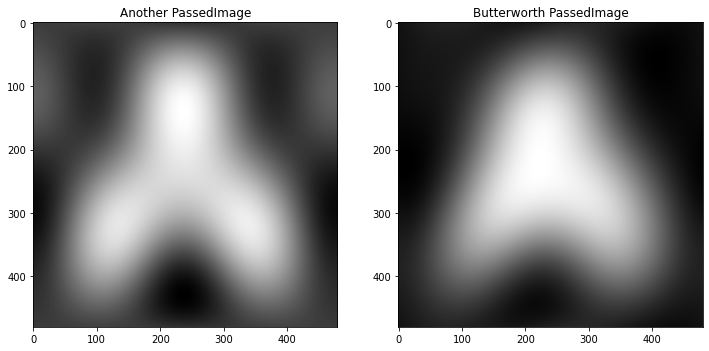

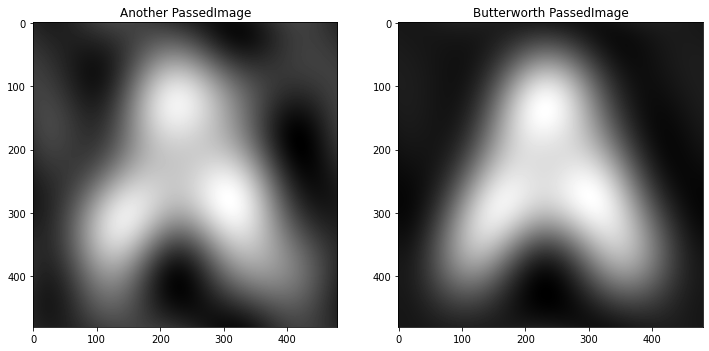

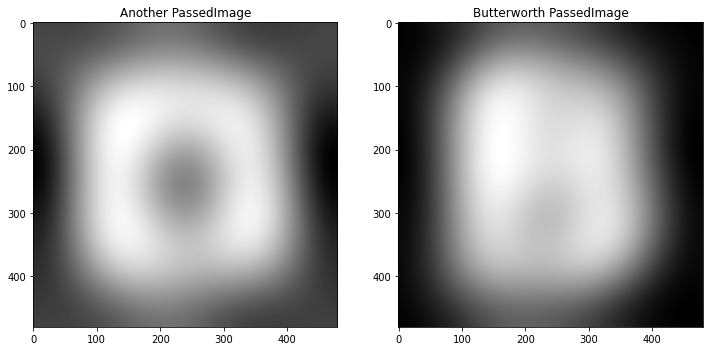

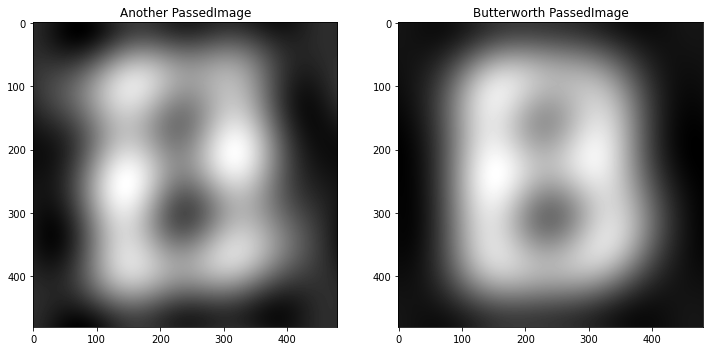

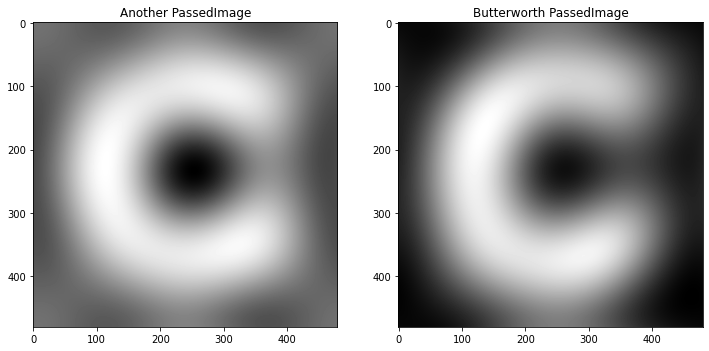

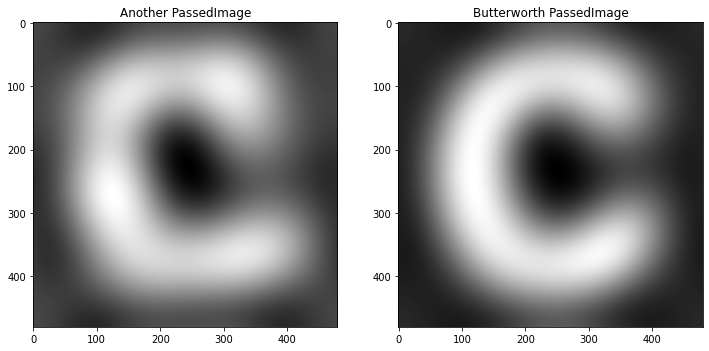

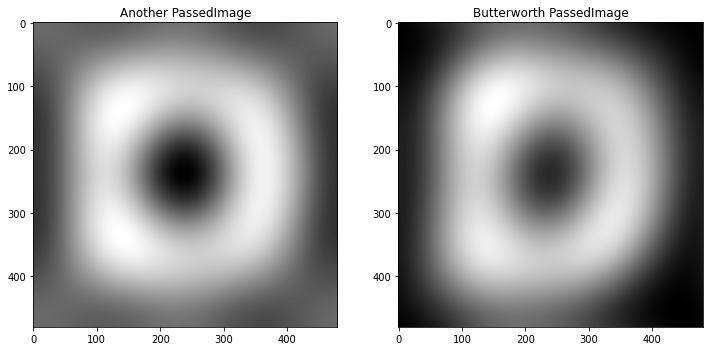

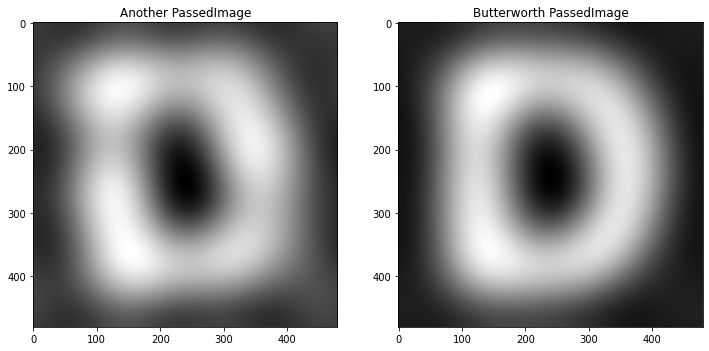

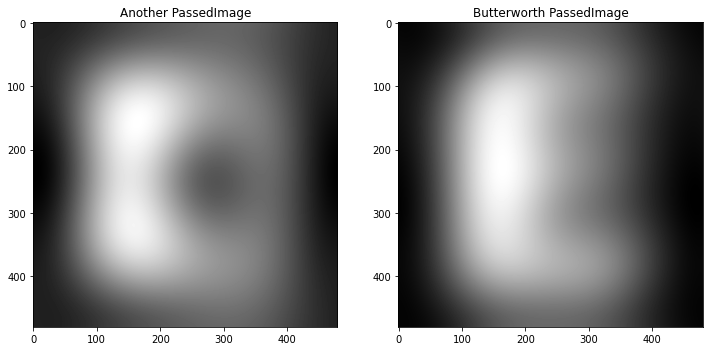

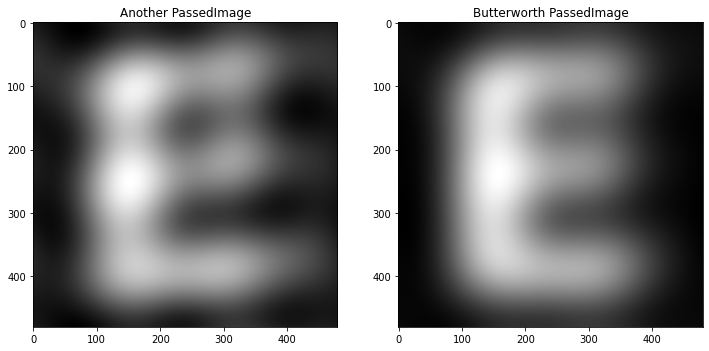

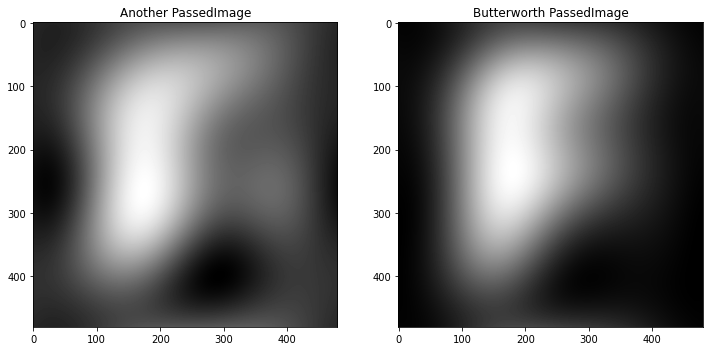

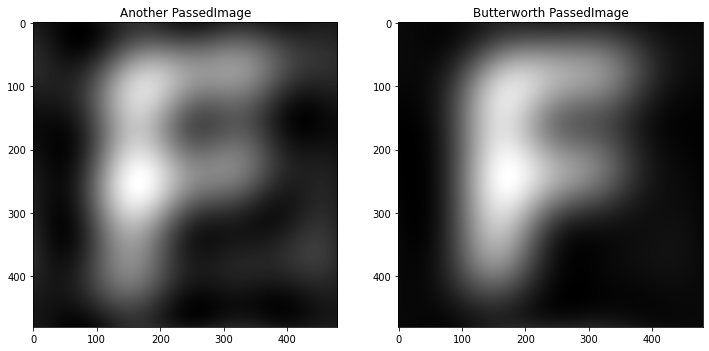

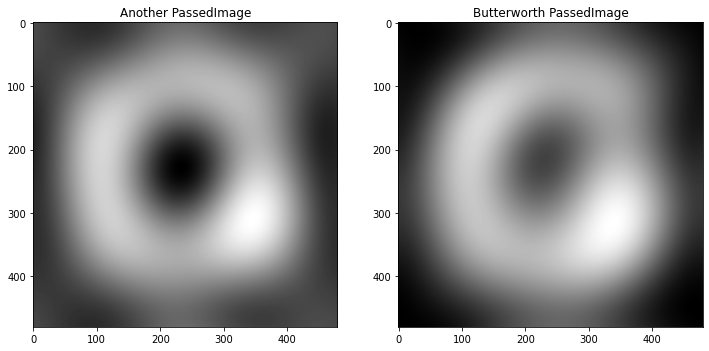

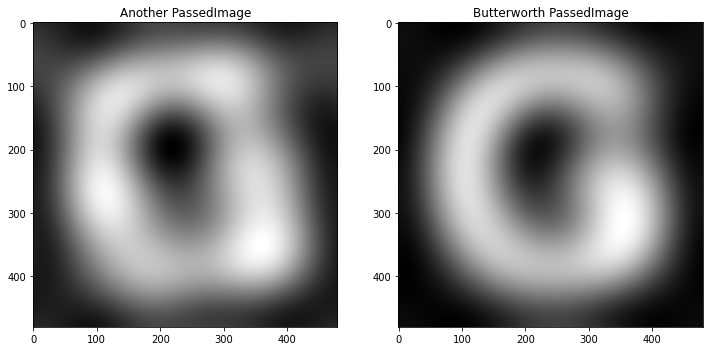

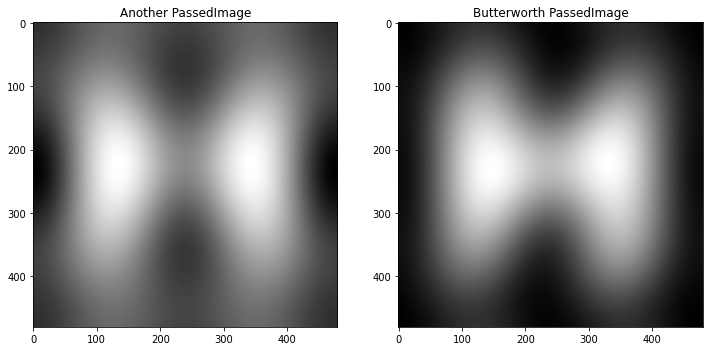

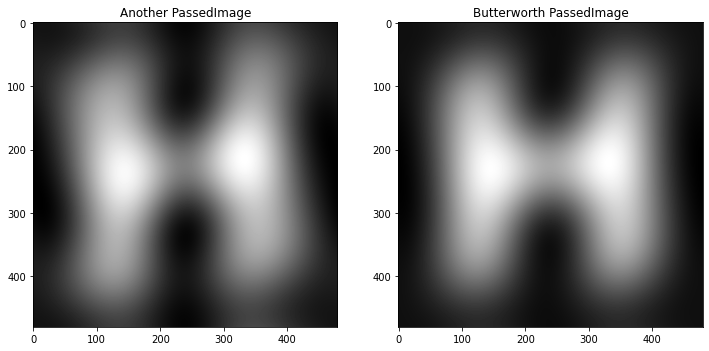

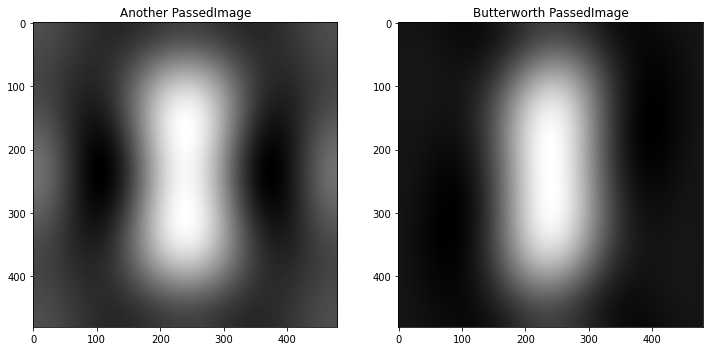

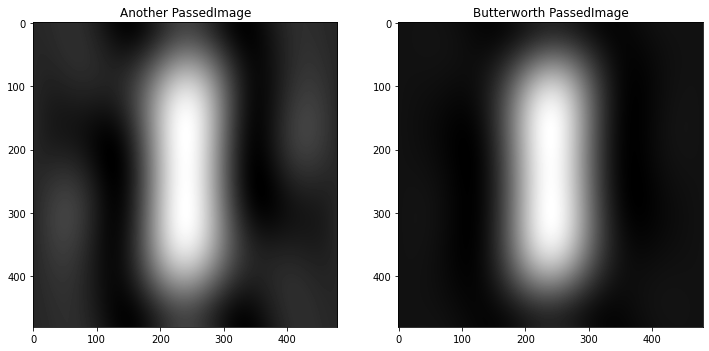

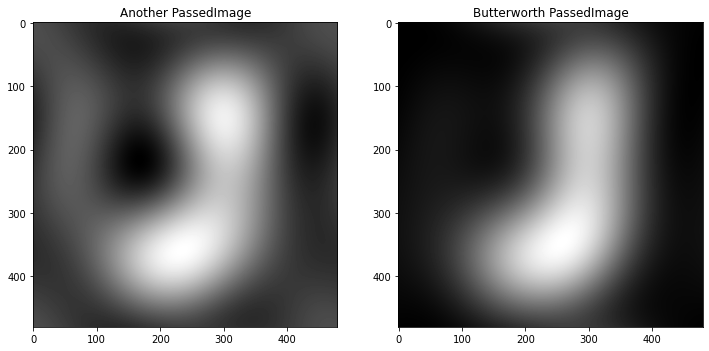

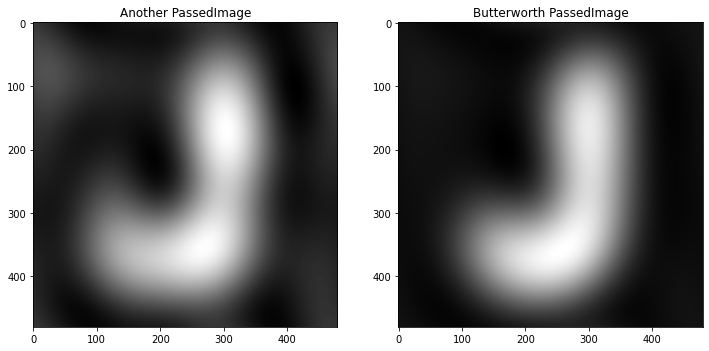

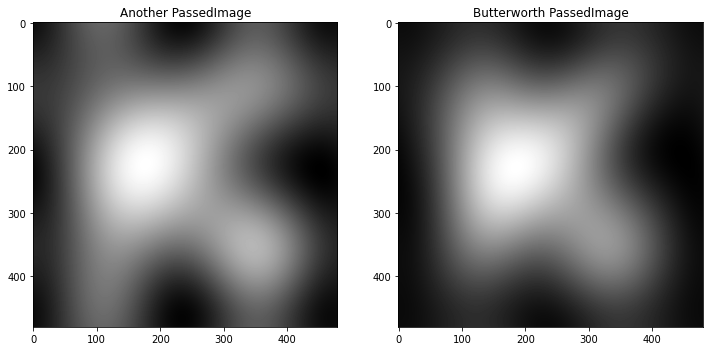

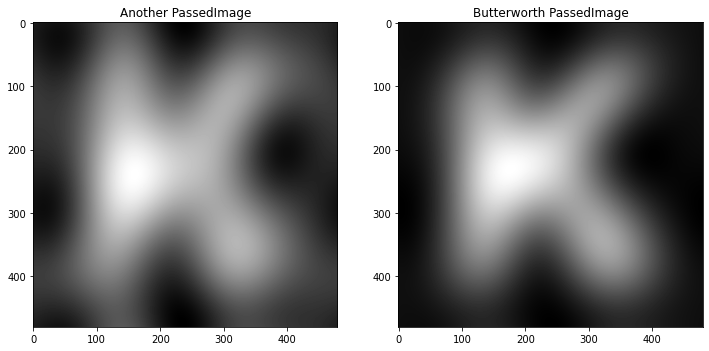

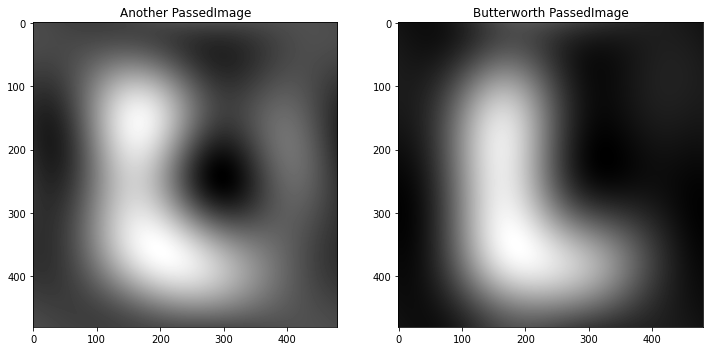

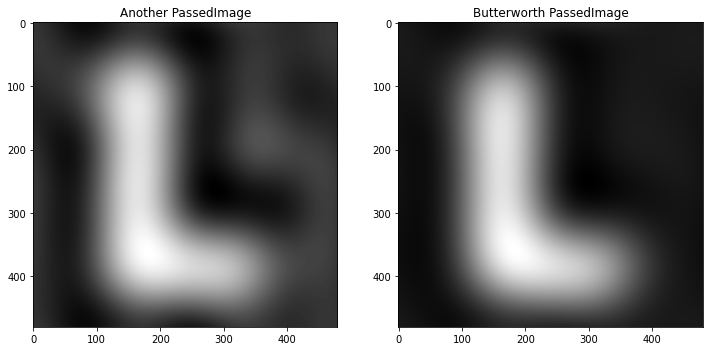

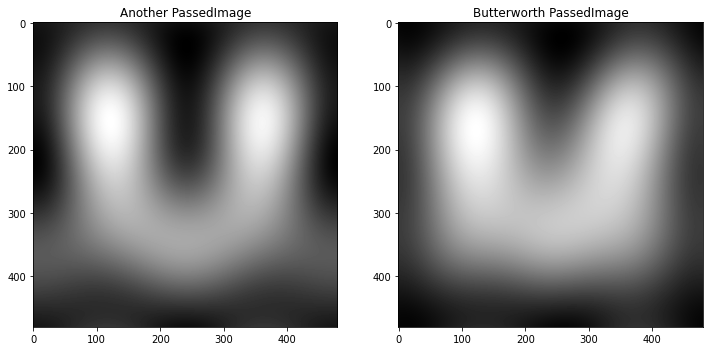

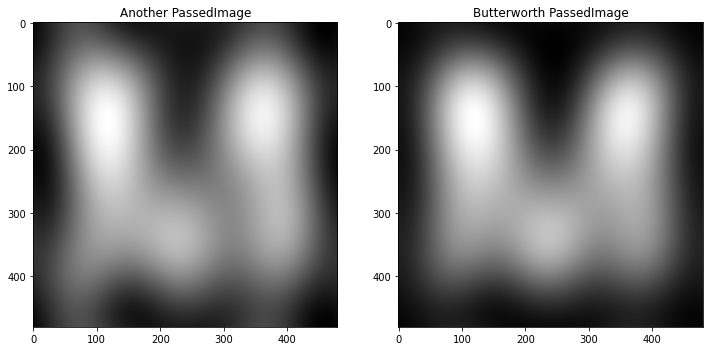

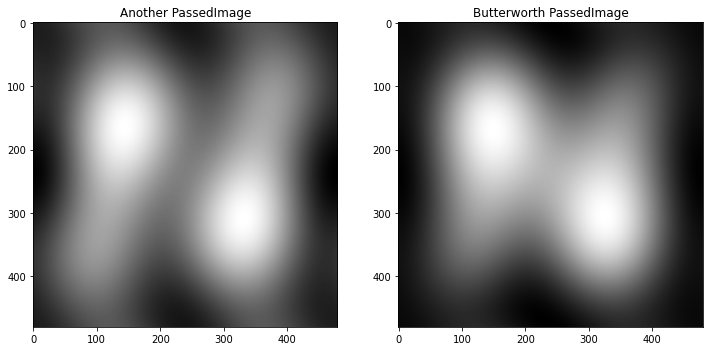

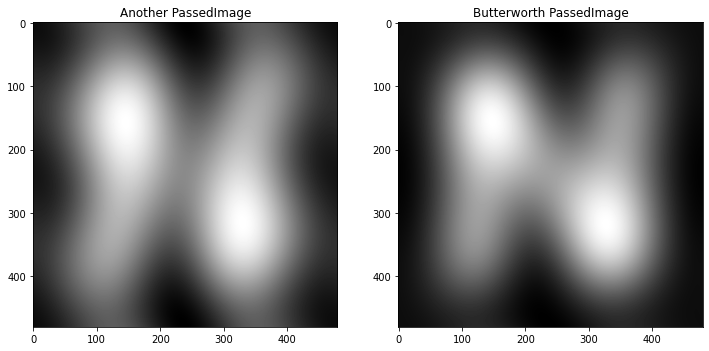

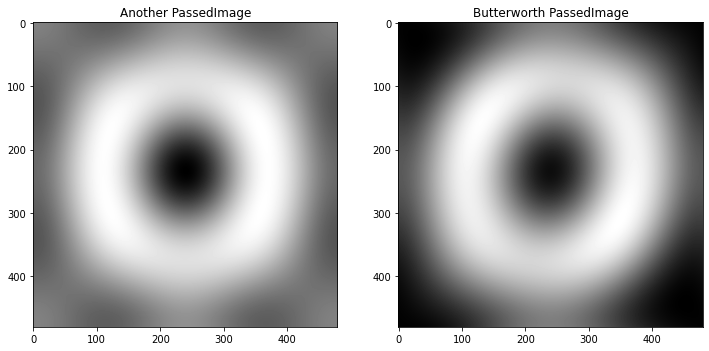

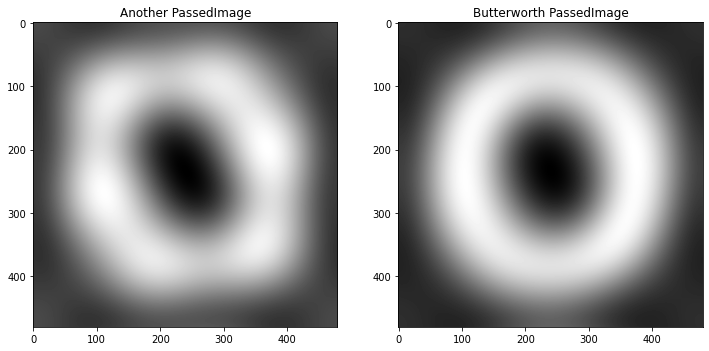

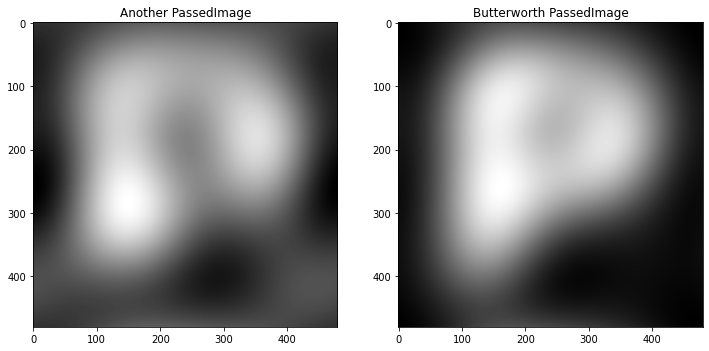

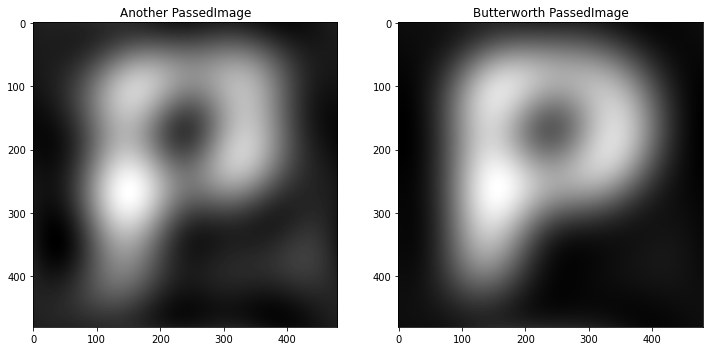

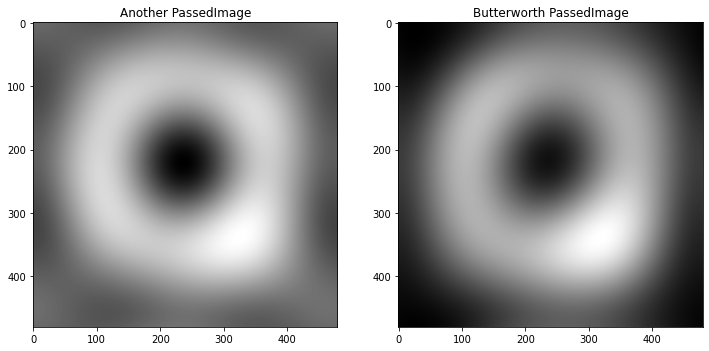

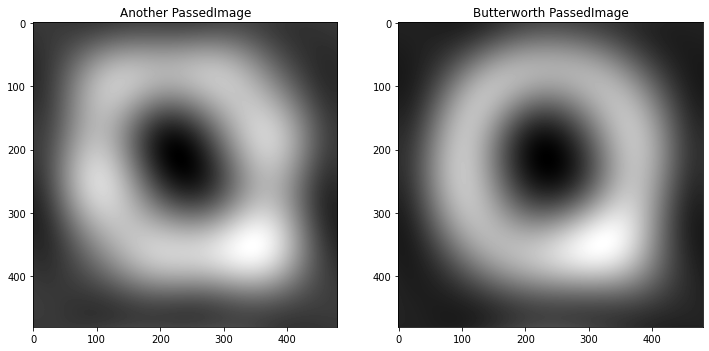

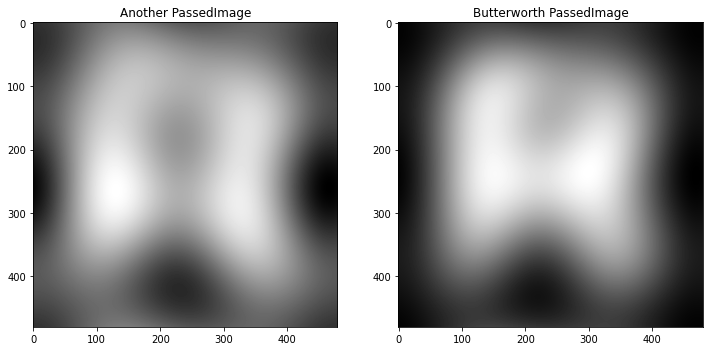

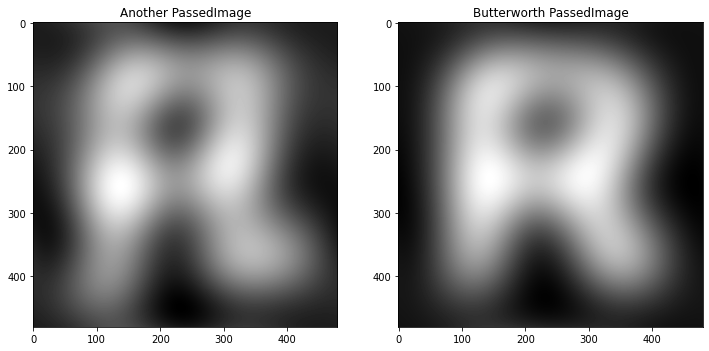

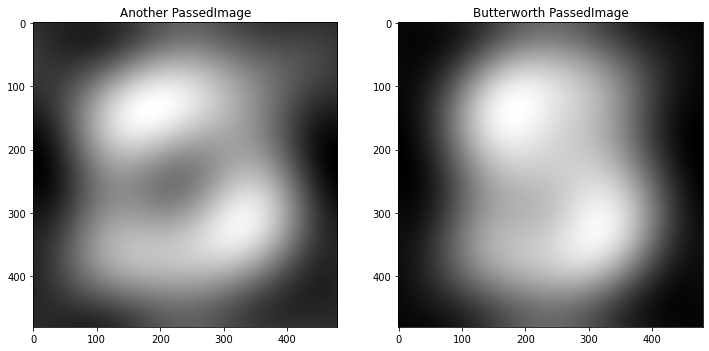

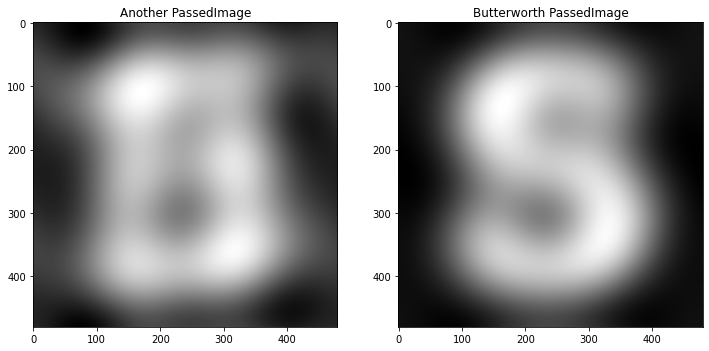

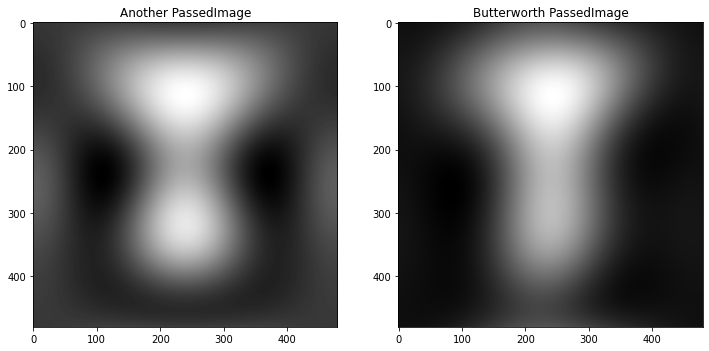

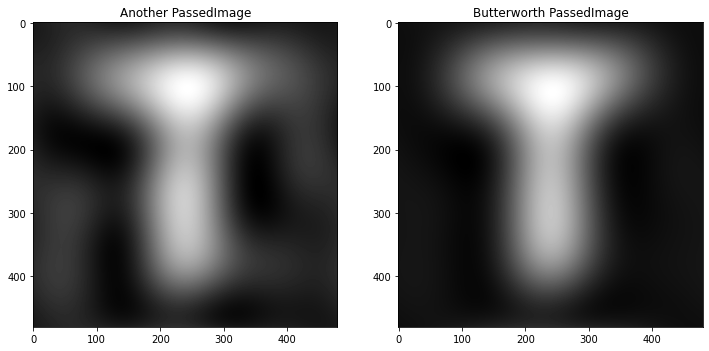

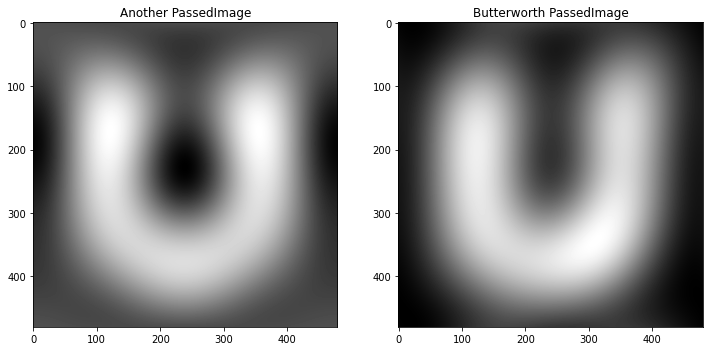

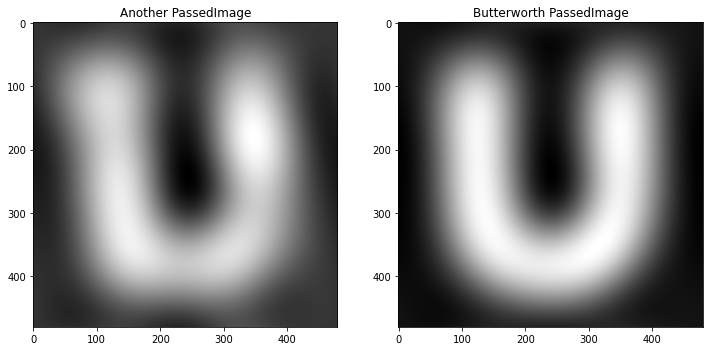

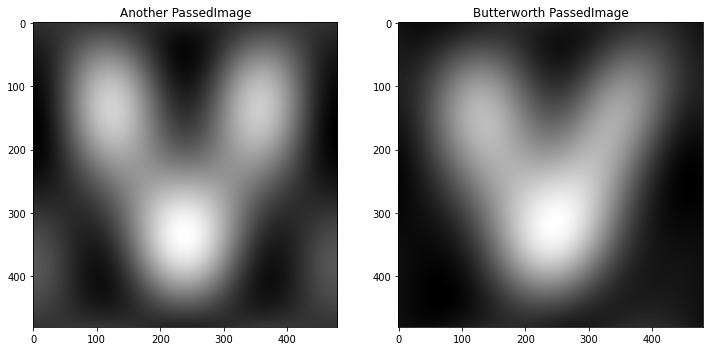

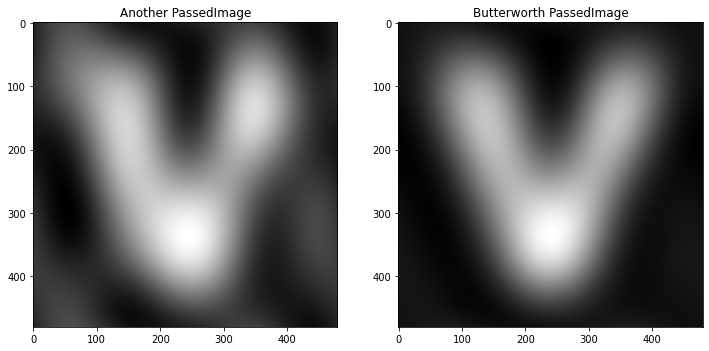

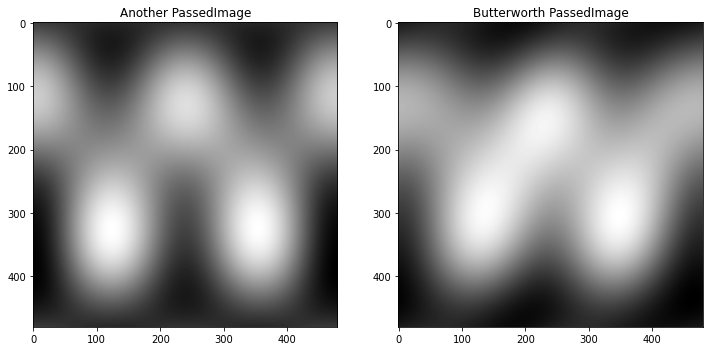

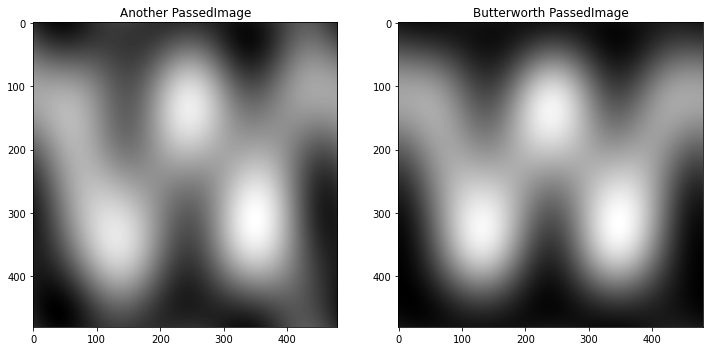

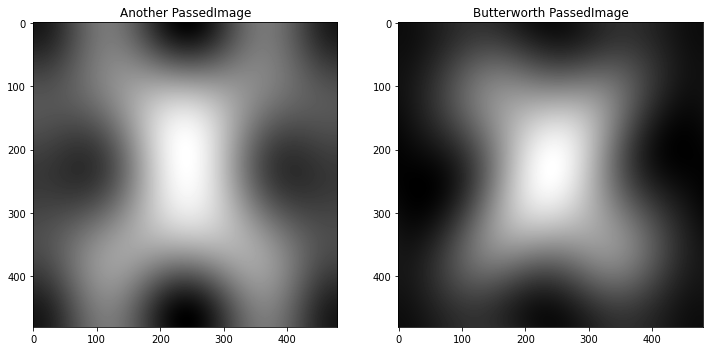

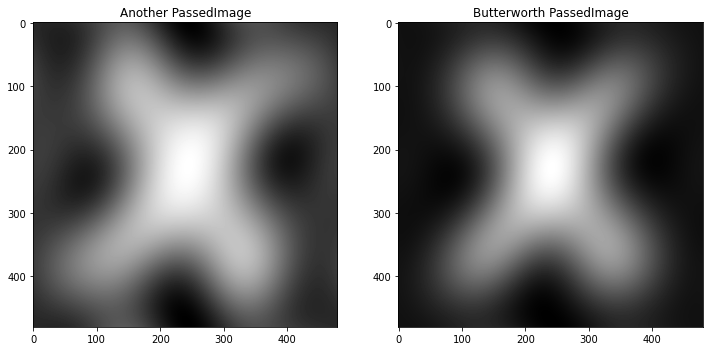

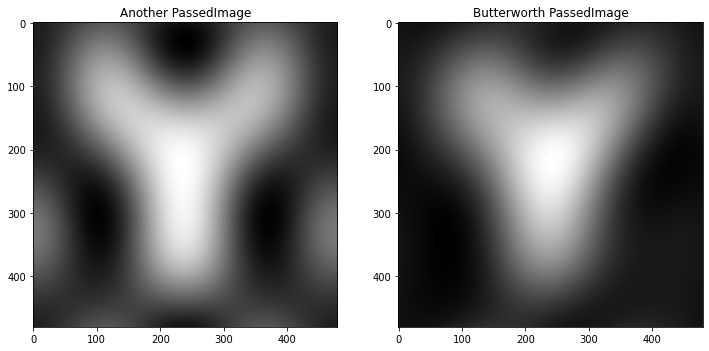

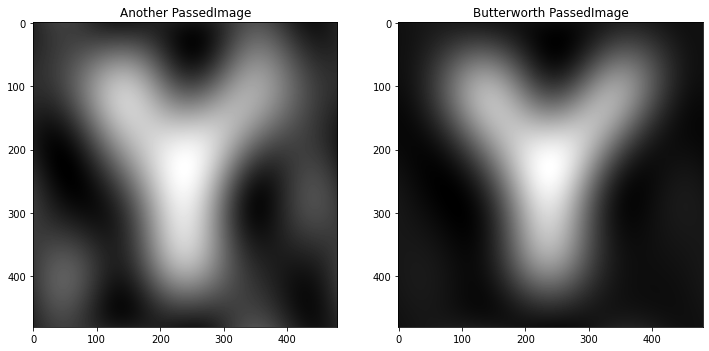

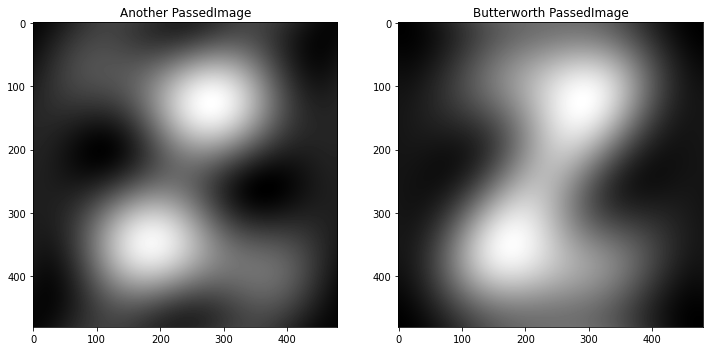

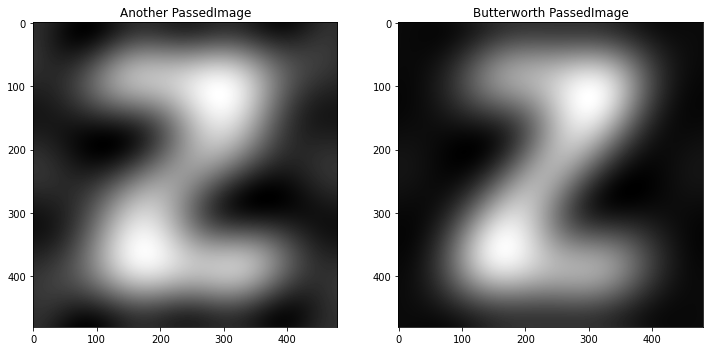

In [74]:
for alphabet_index in range(len(alp)):
    # フィルタを適用する前の元画像を指定してます。
    original_image = new_dir_path+"/"+alp[alphabet_index]+str(square)+"x"+str(square)+".png"
    
    # 画像を二次元フーリエ変換をします。
    shifted_f_uv = img_shiftedFuv(original_image)
    
    # max_cycleを含んでます。
    for cycle in range(min_cycle, max_cycle+1):
        # バタワースではない方のフィルタの保存先pathです。
        not_butter_file_path = Passed_save_path + "/"+alp[alphabet_index]+"_"+str(cycle)+"cpd_Afilter.png"
        # バタワースフィルタの保存先pathです。
        butter_file_path          = Passed_save_path + "/"+alp[alphabet_index]+"_"+str(cycle)+"cpd_Bfilter.png"
        
        # cycle（画像に何個しましまが含まれるか）と、二次元フーリエ変換の半径を対応させてます。
        radius = cycle_to_radius(cycle)
        
        filter_Image_list = filter_passedImage(shifted_f_uv, radius)
        # filter_Image_list[0]はバタワースではない方のフィルタ自体の画像。
        # filter_Image_list[1]はバタワースではない方のフィルタを適用した画像。
        # filter_Image_list[２]はバタワースでフィルタ自体の画像。
        # filter_Image_list[３]はバタワースでフィルタを適用した画像。
        
        # 画像を保存しました。
        plt.imsave(not_butter_file_path, filter_Image_list[1])
        plt.imsave(butter_file_path, filter_Image_list[3])
        
        # 確認のために表示させました。
        fig, axes = plt.subplots(1, 2, figsize=(12, 12))
        axes[0].imshow(filter_Image_list[1], cmap='gray')
        axes[0].set_title('Another PassedImage')

        axes[1].imshow(filter_Image_list[3], cmap='gray')
        axes[1].set_title('Butterworth PassedImage')
        plt.show()

In [49]:
# 画像を二次元フーリエ変換をします。
def img_shiftedFuv(img_file):
    img = Image.open(img_file)
    gray_img = img.convert('L')
    f_xy = np.asarray(gray_img)
    f_uv = np.fft.fft2(f_xy)
    shifted_f_uv = np.fft.fftshift(f_uv)
    return shifted_f_uv

In [47]:
# バタワースではない方のフィルタを作成してます。
def make_lowFilter(ellipse_percentage, shifted_f_uv):
    # フィルタ (ローパス) を用意する
    x_pass_filter = Image.new(mode='L',  # 8-bit pixels, black and white
                              size=(shifted_f_uv.shape[0],
                                    shifted_f_uv.shape[1]),
                              color=0,  # default black
                              )
    # 中心に円を描く
    draw = ImageDraw.Draw(x_pass_filter)
    # 円の半径
    ellipse_r = shifted_f_uv.shape[0] * ellipse_percentage
    # 画像の中心
    center = (shifted_f_uv.shape[0] // 2,
              shifted_f_uv.shape[1] // 2)
    # 円の座標
    ellipse_pos = (center[0] - ellipse_r,
                   center[1] - ellipse_r,
                   center[0] + ellipse_r,
                   center[1] + ellipse_r)
    draw.ellipse(ellipse_pos, fill=255)
    # フィルタ
    filter_array = np.asarray(x_pass_filter)    
    return filter_array

In [48]:
# バタワースフィルタともう一つのフィルタを作成し、適用してます。フィルタ自体と、画像に適用した結果をリストで戻してます。
def filter_passedImage(shifted_f_uv, val):
    
    ###　
    # バタワースフィルタを作成してます。
    butter_filter = psychopy.filters.butter2d_lp(
        size=(square,square),
        cutoff=val/(square*2),
        n=4)
    # バタワースフィルタではない方を適用してます。
    filtered_f_uv = np.multiply(shifted_f_uv, butter_filter)
    
    # 以下は逆フーリエ変換です。
    unshifted_f_uv = np.fft.fftshift(filtered_f_uv)
    i_f_xy_butter = np.fft.ifft2(unshifted_f_uv).real
    ###
    
    
    ###
    # バタワースフィルタではない方を作成してます。
    filter_not_butter = make_lowFilter(val/(square*2), shifted_f_uv)
    # バタワースフィルタではない方を適用してます。
    filtered_f_uv_not_butter = np.multiply(shifted_f_uv, filter_not_butter)
    
    # 以下は逆フーリエ変換です。
    unshifted_f_uv_not_butter = np.fft.fftshift(filtered_f_uv_not_butter)
    i_f_xy_not_butter = np.fft.ifft2(unshifted_f_uv_not_butter).real
    ###
    
    filter_Image_list = []
    filter_Image_list.append(filter_not_butter)
    filter_Image_list.append(i_f_xy_not_butter) 
    filter_Image_list.append(butter_filter)
    filter_Image_list.append(i_f_xy_butter) 
    
    return filter_Image_list

In [62]:
def cycle_to_radius(cycle):
    radius = cycle
    return radius